In [2]:
#load california housing dataset
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing(as_frame=True)
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

The description indicates that the dataset has 8 independent variables (predictors) and one dependent (target) variable. 

In [3]:
#Examine the dataset
california_housing.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
#Check dataset summary
california_housing.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


The summary confirms that dataset contains 8 features, 1 label and 20,640 samples. There are no missing values and all values are encoded as floating numbers.

In [5]:
#Import regression libraries
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
# Load the California housing dataset as data and target
X,y = fetch_california_housing(return_X_y=True)

# Divide data into training set and test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=10)

In [7]:
# Create linear regression model without regularization
regr = LinearRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

print("Linear Regression (without regularization)")
print("Weights: \n",  regr.coef_)
print("MSE: %.3f" % mean_squared_error(y_test, y_pred))
print("R^2: %.3f" % r2_score(y_test, y_pred))


Linear Regression (without regularization)
Weights: 
 [ 4.33102288e-01  9.32362843e-03 -1.00332994e-01  6.15219176e-01
 -2.55110625e-06 -4.78180583e-03 -4.29077359e-01 -4.41484229e-01]
MSE: 0.544
R^2: 0.601


In [8]:
# Create Ridge regression model 
regr = Ridge()
regr.fit(X, y)
y_pred=regr.predict(x_test)

print("Ridge Regression (L2 regularization)")
print("Weights: \n",  regr.coef_)
print("MSE: %.3f" % mean_squared_error(y_test, y_pred))
print("R^2: %.3f" % r2_score(y_test, y_pred))


Ridge Regression (L2 regularization)
Weights: 
 [ 4.36594382e-01  9.43739513e-03 -1.07132761e-01  6.44062485e-01
 -3.97034295e-06 -3.78635869e-03 -4.21299306e-01 -4.34484717e-01]
MSE: 0.543
R^2: 0.602


In [9]:
# Create LASSO regression model 
regr = Lasso()
regr.fit(X, y)
y_pred=regr.predict(x_test)

print("Lasso Regression (L1 regularization)")
print("Weights: \n",  regr.coef_)
print("MSE: %.3f" % mean_squared_error(y_test, y_pred))
print("R^2: %.3f" % r2_score(y_test, y_pred))

Lasso Regression (L1 regularization)
Weights: 
 [ 1.45469232e-01  5.81496884e-03  0.00000000e+00 -0.00000000e+00
 -6.37292607e-06 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00]
MSE: 0.974
R^2: 0.286


In [10]:
# Create Elasic Net regression model 
regr = ElasticNet()
regr.fit(X, y)
y_pred=regr.predict(x_test)

print("Ridge Regression (L1+L2 regularization)")
print("Weights: \n",  regr.coef_)
print("MSE: %.3f" % mean_squared_error(y_test, y_pred))
print("R^2: %.3f" % r2_score(y_test, y_pred))

Ridge Regression (L1+L2 regularization)
Weights: 
 [ 2.53202643e-01  1.12982857e-02  0.00000000e+00 -0.00000000e+00
  9.63636030e-06 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00]
MSE: 0.786
R^2: 0.424


According to the regression models, Ridge has the highest R-squared, while Lasso has the lowest. Ridge also has the lowest MSE with Lasso having the highest. The Ridge solution is closely similar to the Linear Regression model. There is also a sigificant reduction in the Lasso weights compared to the other models. 

In [11]:
# Create a polynomial dataset. Square the label to make it nonlinear.
from sklearn.datasets import make_regression
X, y = make_regression(n_samples = 1000, n_features=1, noise=8, bias=2)
y2 = y**2

In [12]:
# Import libraries
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import math
import pandas as pd
import numpy as np

In [13]:
# Create dataframe
poly_dataset = pd.DataFrame(X)
poly_dataset.columns = ['X']
poly_dataset['Y'] = y2
poly_dataset.head(5)

,X,Y
0,-0.785668,4468.021304
1,1.435320,15695.522678
2,-0.672482,4162.589696
3,0.408431,1206.035871
4,0.792380,3917.659999


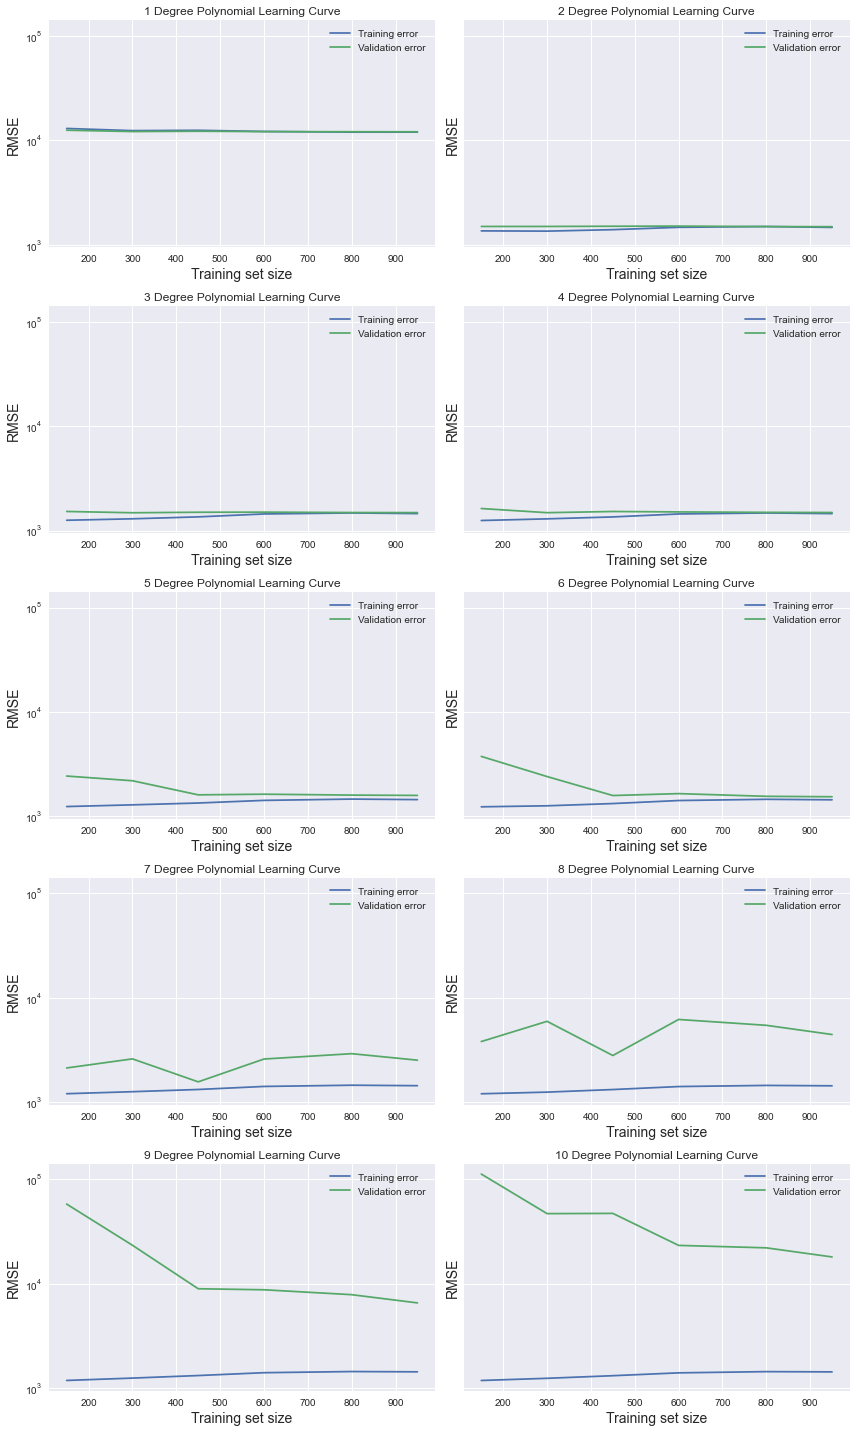

In [17]:
# Compare distance between training error and the validation error for different polynomial degrees and training sets

degree = 10
fig, ax = plt.subplots(math.ceil(degree/2),2, figsize=(12, 20), sharey=True)
ax=ax.flatten()
plt.style.use('seaborn')
train_sizes = [150, 300, 450, 600, 800, 950]  # Absolute sizes of the training sets
K = 20                                        # Choosing K for K-Fold Cross-Validation
estimator = LinearRegression()
rmseval = []
rmsetrain = []
for i in range(10):
    
    poly_reg = PolynomialFeatures(degree=i+1)
    x = poly_reg.fit_transform(poly_dataset[['X']])
    
    train_sizes, train_scores, validation_scores = learning_curve(estimator = estimator, X = x, y = poly_dataset['Y'], cv = K, train_sizes=train_sizes, scoring = 'neg_mean_squared_error')
    
    train_scores_mean = np.sqrt(-train_scores.mean(axis = 1))          
    validation_scores_mean = np.sqrt(-validation_scores.mean(axis = 1))
    
    rmseval.append(validation_scores_mean[5]) #Store the mean training and validation scores
    rmsetrain.append(train_scores_mean[5])

    
    # Plot learning curve
    ax[i].plot(train_sizes, train_scores_mean, label = 'Training error')
    ax[i].plot(train_sizes, validation_scores_mean, label = 'Validation error')
    ax[i].set_yscale('log')
    ax[i].set_ylabel('RMSE', fontsize = 14)
    ax[i].set_xlabel('Training set size', fontsize = 14)
    ax[i].legend()
    ax[i].set_title('{} Degree Polynomial Learning Curve'.format(i+1))

fig.tight_layout()

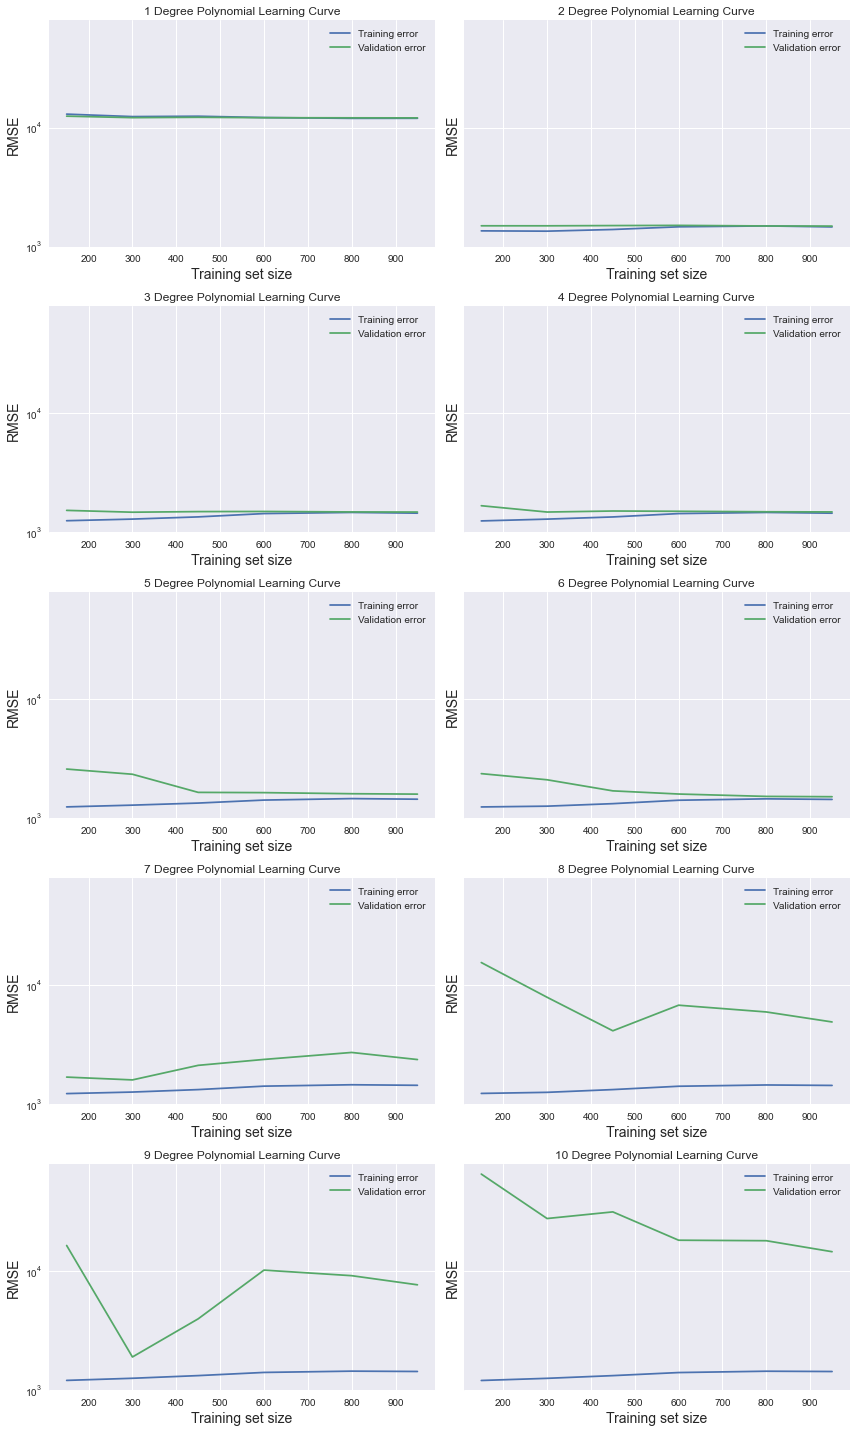

In [16]:
# Compare distance between training error and the validation error for different polynomial degrees and training sets using L2 (Ridge) regularization

degree = 10
fig, ax = plt.subplots(math.ceil(degree/2),2, figsize=(12, 20), sharey=True)
ax=ax.flatten()
plt.style.use('seaborn')
train_sizes = [150, 300, 450, 600, 800, 950]  # Absolute sizes of the training sets
K = 20                                        # Choosing K for K-Fold Cross-Validation
estimator = Ridge()
rmseval = []
rmsetrain = []
for i in range(10):
    
    poly_reg = PolynomialFeatures(degree=i+1)
    x = poly_reg.fit_transform(poly_dataset[['X']])
    
    train_sizes, train_scores, validation_scores = learning_curve(estimator = estimator, X = x, y = poly_dataset['Y'], cv = K, train_sizes=train_sizes, scoring = 'neg_mean_squared_error')
    
    train_scores_mean = np.sqrt(-train_scores.mean(axis = 1))          
    validation_scores_mean = np.sqrt(-validation_scores.mean(axis = 1))
    
    rmseval.append(validation_scores_mean[5]) #Store the mean training and validation scores
    rmsetrain.append(train_scores_mean[5])

    
    # Plot learning curve
    ax[i].plot(train_sizes, train_scores_mean, label = 'Training error')
    ax[i].plot(train_sizes, validation_scores_mean, label = 'Validation error')
    ax[i].set_yscale('log')
    ax[i].set_ylabel('RMSE', fontsize = 14)
    ax[i].set_xlabel('Training set size', fontsize = 14)
    ax[i].legend()
    ax[i].set_title('{} Degree Polynomial Learning Curve'.format(i+1))

fig.tight_layout()

In the above plots, the gap between the training error and validation error decreases with a decrease in polynomial degrees and with an increase in the training set size. In both cases, models with high degrees are overfit (high variance) and the best performance (convergence of training and validation errors) is using a 4𝑡ℎ order polynomial. However without regularization, a larger training set is required for convergence compared to the inclusion of L2 regularization.